# 4. 파이차트 그리기
## 4.1 파이차트
- 각 범주(Category)가 데이터에서 차지하는 비율을 나타내는데 사용
- `pie(x, labels)` 이용
    - x: 값 (값들을 100을 기준으로 비율을 계산해 크기 설정)
    - labels : 값들의 label
    - autopct: 조각내에 표시될 비율의 문자열 형식. '%fmt문자' 
        - fmt문자: f(실수), d(정수), %% (%)
            

In [1]:
a = 10
b = 5.23
f'{a}, {b}'
'{}, {}'.format(a, b)
'%d - %f' % (a, b)

'10 - 5.230000'

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mlp
mlp.rcParams.update(mlp.rcParamsDefault)
plt.style.use('bmh')

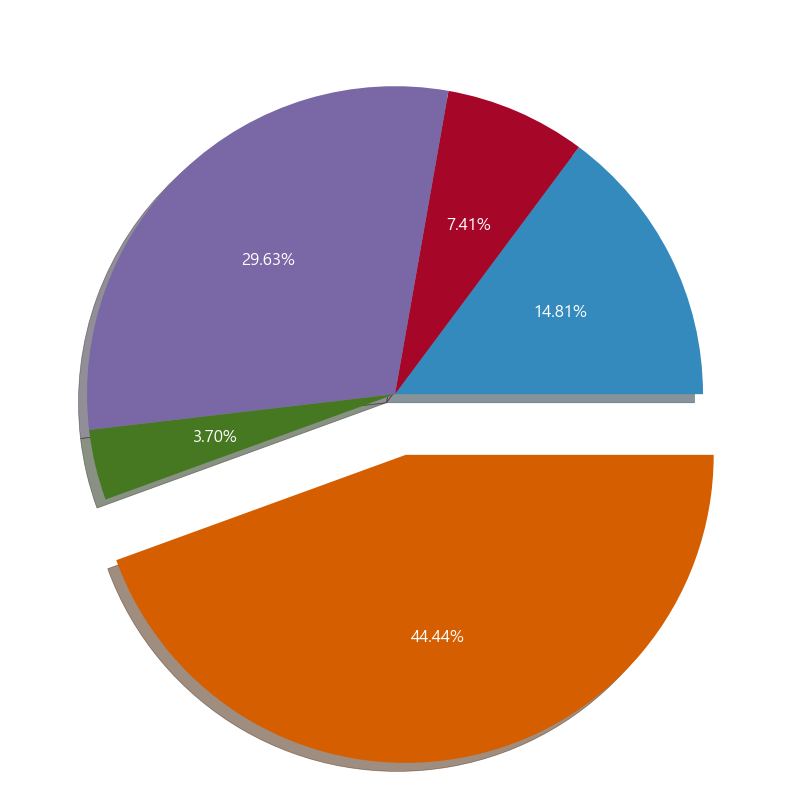

In [9]:
labels = ['사과', '배', '복숭아', '수박', '딸기']
amount = [20, 10, 40, 5, 60]

plt.figure(figsize=(10,10))
plt.pie(amount, labels=labels, autopct='%.2f%%',
       explode=[0,0,0,0,0.2], shadow=True)

plt.show()

## 4.2 파이차트 활용
- 한국 웹브라우저 점유율을 파이차트로 작성
    - https://www.koreahtml5.kr/front/stats/browser/browserUseStats.do

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_excel('data/webbrowser_share.xls')
df.head()

,date,Chrome,IE,Edge,Safari,Whale Browser,Firefox,Opera,Swing,Phantom,...,QQ Browser,Vivaldi,360 Safe Browser,Maxthon,Coc Coc,Puffin,Yandex Browser,Sogou Explorer,Mozilla,Whale
0,2018.08,59.12,31.06,2.97,2.52,1.36,1.26,0.88,0.39,0.25,...,0.02,0.02,0.02,0.02,0.00,0.00,0.01,0.01,0.00,0.0
1,2018.09,61.95,27.84,3.16,2.19,1.27,2.57,0.40,0.37,0.00,...,0.03,0.02,0.06,0.02,0.00,0.00,0.02,0.03,0.00,0.0
2,2018.10,62.05,28.36,3.35,2.43,1.28,1.36,0.59,0.35,0.00,...,0.02,0.02,0.02,0.02,0.01,0.00,0.01,0.03,0.01,0.0
3,2018.11,65.31,26.29,3.06,2.09,1.16,1.10,0.55,0.26,0.00,...,0.02,0.02,0.02,0.02,0.01,0.01,0.00,0.02,0.01,0.0
4,2018.12,68.34,22.31,2.99,2.02,1.11,2.04,0.63,0.25,0.00,...,0.04,0.01,0.02,0.02,0.03,0.01,0.04,0.02,0.00,0.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              12 non-null     float64
 1   Chrome            12 non-null     float64
 2   IE                12 non-null     float64
 3   Edge              12 non-null     float64
 4   Safari            12 non-null     float64
 5   Whale Browser     12 non-null     float64
 6   Firefox           12 non-null     float64
 7   Opera             12 non-null     float64
 8   Swing             12 non-null     float64
 9   Phantom           12 non-null     float64
 10  UC Browser        12 non-null     float64
 11  Chromium          12 non-null     float64
 12  QQ Browser        12 non-null     float64
 13  Vivaldi           12 non-null     float64
 14  360 Safe Browser  12 non-null     float64
 15  Maxthon           12 non-null     float64
 16  Coc Coc           12 non-null     float64
 17 

In [29]:
# df['date'] = df['date'].astype("object") # 읽어온 후 타입변경
df = pd.read_excel('data/webbrowser_share.xls', converters={'date':np.str}) # 읽어옴과 동시에 타입변경
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              12 non-null     object 
 1   Chrome            12 non-null     float64
 2   IE                12 non-null     float64
 3   Edge              12 non-null     float64
 4   Safari            12 non-null     float64
 5   Whale Browser     12 non-null     float64
 6   Firefox           12 non-null     float64
 7   Opera             12 non-null     float64
 8   Swing             12 non-null     float64
 9   Phantom           12 non-null     float64
 10  UC Browser        12 non-null     float64
 11  Chromium          12 non-null     float64
 12  QQ Browser        12 non-null     float64
 13  Vivaldi           12 non-null     float64
 14  360 Safe Browser  12 non-null     float64
 15  Maxthon           12 non-null     float64
 16  Coc Coc           12 non-null     float64
 17 

In [30]:
df.set_index('date', inplace=True)

In [34]:
etc = df[df.columns[6:]].sum(axis=1)
web_df = df[df.columns[:6]].copy()
web_df['ETC'] = etc
web_df

,Chrome,IE,Edge,Safari,Whale Browser,Firefox,ETC
date,,,,,,,
2018.08,59.12,31.06,2.97,2.52,1.36,1.26,1.68
2018.09,61.95,27.84,3.16,2.19,1.27,2.57,1.00
2018.10,62.05,28.36,3.35,2.43,1.28,1.36,1.14
2018.11,65.31,26.29,3.06,2.09,1.16,1.10,0.98
2018.12,68.34,22.31,2.99,2.02,1.11,2.04,1.17
2019.01,70.46,21.05,2.99,2.07,1.14,1.15,1.10
2019.02,70.63,20.71,2.68,2.53,1.22,1.21,1.00
2019.03,63.35,25.42,3.81,3.16,1.65,1.49,1.11
2019.04,63.63,24.65,4.08,3.11,1.64,1.61,1.27


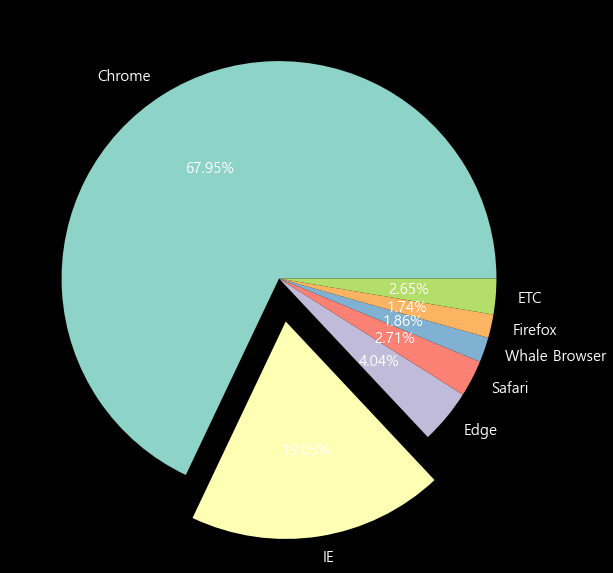

In [40]:
# 2019.07 브라우저 점유율의 비율
plt.figure(figsize=(10,10))
plt.pie(web_df.loc['2019.07'],
        labels=web_df.columns,
       autopct='%.2f%%',
        textprops={'fontsize':15},
       explode=[0,0.2,0,0,0,0,0])

plt.show()

# 5 히스토그램 그리기
## .1 히스토그램
- 표로 된 도수 분포표를 그래프로 나타낸 것.
    - 도수분포표: 특정 그룹안에 값의 빈도를 나타낸 표
    - 주로 연속형 자료를 특정 구간으로 나눠 그 빈도를 확인한다.
        - 빈도 확인이나 **분포**를 볼때 사용한다.
    - X축: 계급(변수구간)의 대표값, Y축: 빈도수
- `hist(data [, bins=계급개수])` 메소드를 사용
    - data: 리스트형의 객체를 전달한다.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [42]:
data = np.random.normal(100, 10, 1000) # 평균:100, 표준편차:10, 개수:1000 실수 난수
a = np.unique(data, return_counts=True) # 고유값 + 각각의 개수
a[0].min(), a[0].max()

(70.38885560790835, 129.33302677419232)

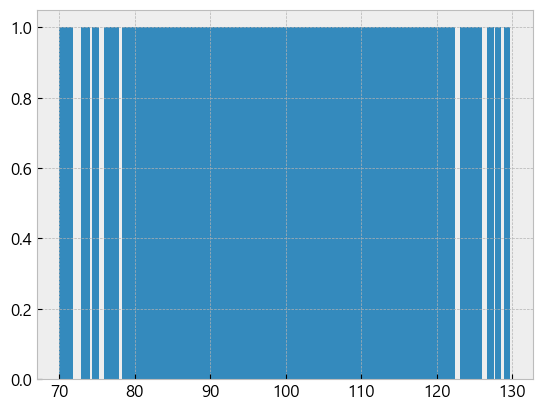

In [45]:
plt.bar(a[0], a[1]) # x:값, y:수량
plt.show()

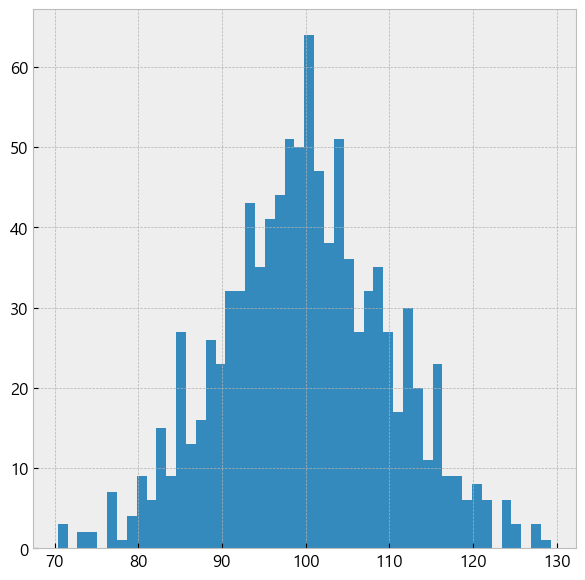

In [46]:
plt.figure(figsize=(7,7))
plt.hist(a[0], bins=50)
plt.show()

## 5.2 히스토그램 활용
- tips.csv
    - 식당에서 팁을 지불한 손님의 정보를 모아둔 데이터 셋    

In [48]:
tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

In [51]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [52]:
thips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### total_bill 의 분포를 시각화

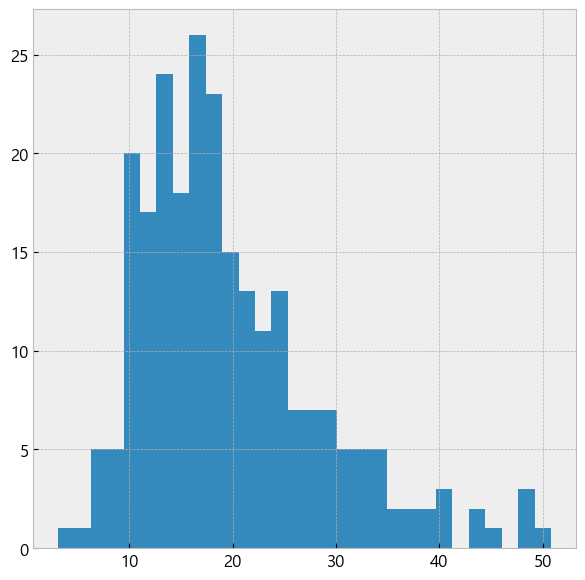

In [54]:
plt.figure(figsize=(7,7))
plt.hist(tips['total_bill'], bins=30)
plt.show()

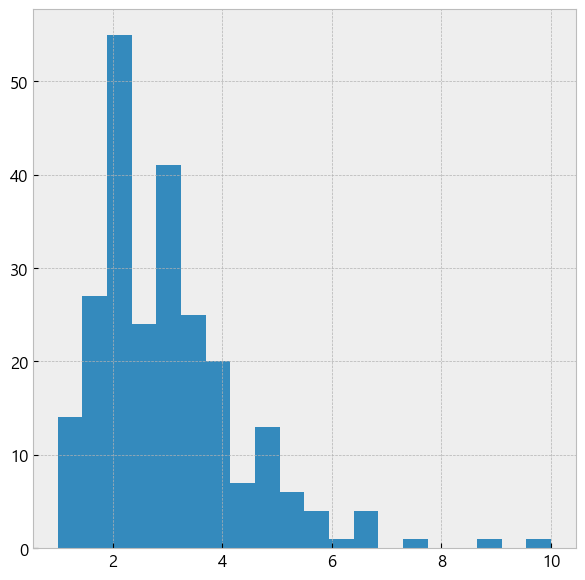

In [55]:
plt.figure(figsize=(7,7))
plt.hist(tips['tip'], bins=20)
plt.show()

# 6. 상자그래프(Boxplot) 그리기
## 6.1 상자그래프란
- 값들의 중간값, 사분위수, 정상범위 내에서 최대/최소값, 극단값들을 보여주어 값들의 분포를 확인 할때 사용한다.
- boxplot(x, whis=1.5)
    - x: 데이터셋
    - whis: 극단치 계산시 사용할 값(기본 1.5)
        - 극단치 : 1사분위와 3사분위에서 $IQR(3사분위수-1사분위수) * whis$ 범위 이상 떨어진 값들

In [56]:
data = np.random.randint(1,100,1000) # 1 ~ 99 1000개의 정수 난수
data[:5] = [200,250,-50,-100,-60]
data[:10]

array([ 200,  250,  -50, -100,  -60,   67,   18,   35,   17,   96])

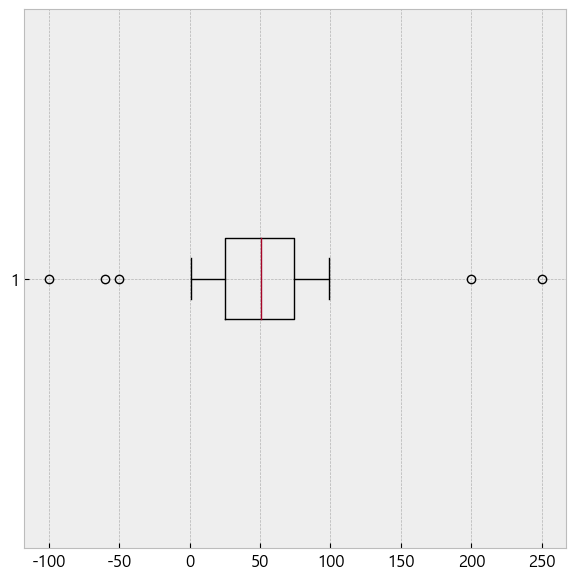

In [63]:
plt.figure(figsize=(7,7))
plt.boxplot(data)
# plt.boxplot(data, whis=5) # whis를 1.5(기본)초과 주면 정상범위 늘리는 것
# plt.boxplot(data, whis=0.3) # whis를 1.5(기본)미만 주면 정상범위 좁히는 것
# plt.boxplot(data, vert=False) # vert 수직방향(기본-True), 수평방향(False)
plt.show()

## 상자그래프 활용
- tips_df 에서 tip의 분포를 상자그래프로 확인

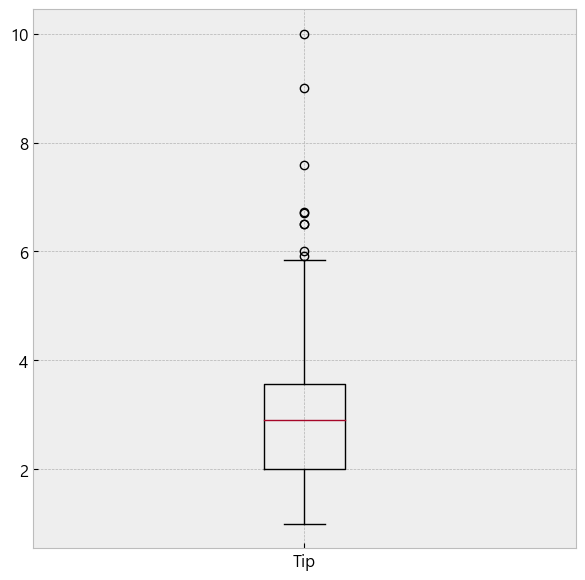

In [65]:
plt.figure(figsize=(7,7))
plt.boxplot(tips['tip'])
plt.xticks([1], ['Tip'])
plt.show()

In [ ]:
plt.boxplot([data1, data2])

In [66]:
male = tips[tips['sex']=='Male']['tip']
female = tips[tips['sex']=='Female']['tip']

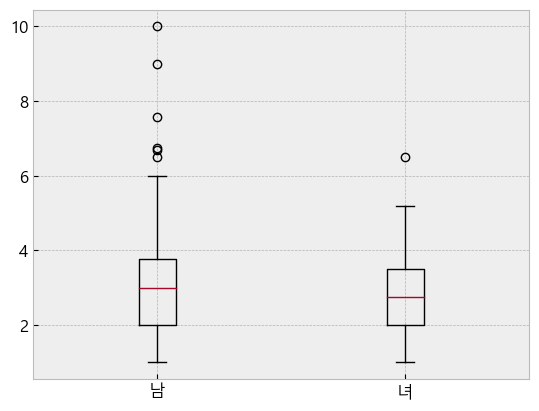

In [68]:
plt.boxplot([male, female])
plt.xticks([1,2], ['남','녀'])
plt.show()

- 남녀별 tip의 분포글 하나의 boxplot에서 그려 분포 비교
- 한 그래프에서 여러 데이터셋의 boxplot을 그리기.
    - 2차원 배열형태의 구조로로 데이터를 제공
    - 행(axis=0) 별로 그래프를 그린다.